In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.misc import imshow
from sklearn.preprocessing import StandardScaler

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

*I will import only 10% of the train data, because my 32-bit system doesn't allow me to work with the whole dataset (MemoryError appears). But the solution is the same.*

In [2]:
data = pd.read_csv('train.csv', nrows=4200)
data.drop(data.columns[[0]], axis=1, inplace=True)

In [3]:
data.shape

(4200, 784)

# 1 PCA

### PCA (hand-written)

*Tranformation of the given (standardized) matrix X:
$$Z = XW$$
Here matrix W is orthogonal ($W^TW = E$) and consists of the eigenvectors of X which are corresponding to the biggest eigenvalues of X.*

In [4]:
def pca(X, n_components):
    # standardization
    X_std = StandardScaler().fit_transform(X)
    # eigenvalues/eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(X_std.T.dot(X_std))
    # they are all real!
    eig_vals = eig_vals.real
    eig_vecs = eig_vecs.real
    # making list of pairs (eigenvalue, eigenvector)
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
    # sorting it in descending order
    eig_pairs = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)
    # selecting first eigenvectors to construct matrix w
    w = np.array([eig_pair[1] for eig_pair in eig_pairs]).T[:, :n_components]
    return X_std.dot(w)

In [5]:
newdata = pca(data, 20)

In [6]:
pd.DataFrame(newdata).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5.255595,-5.253268,3.398053,-2.316072,-5.105228,0.513970,-4.726815,-4.496889,0.815692,1.705913,1.028406,-2.912497,4.589570,-1.357470,0.830515,3.860120,-0.951367,1.178084,-1.942895,0.250965
1,-19.032535,6.452336,0.949562,-3.296702,-2.946343,-2.823914,3.376909,0.083931,-4.821152,3.035689,-3.593040,0.134052,4.105944,-0.158358,3.827012,-0.968417,0.631339,-2.518915,1.813523,-1.265302
2,7.720074,-1.851159,2.125866,1.479282,-4.830110,-3.952087,1.495499,2.444092,0.139636,0.007923,-1.039221,2.676025,-2.556762,3.546375,1.234522,-1.203040,0.015609,-0.116637,0.440421,0.571873
3,0.601179,5.447172,3.170727,3.578024,-2.450203,1.322969,-4.920747,-1.231300,-0.266083,-5.860120,-3.972863,4.091272,0.698244,-2.212264,-0.845655,1.546057,0.356628,-1.442906,0.590415,0.605889
4,-26.086744,6.769636,0.346773,-4.807472,-9.042012,-3.555205,5.562389,-1.488865,-3.828777,5.659342,-0.218627,0.373593,2.066201,-0.061226,1.557417,-0.325930,-0.446138,-1.867179,0.426978,-0.513941


### Plotting eigenvalues

In [7]:
data_std = StandardScaler().fit_transform(data)
eig_vals, eig_vecs = np.linalg.eig(data_std.T.dot(data_std))
eig_vals = eig_vals.real
eig_vecs = eig_vecs.real
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)

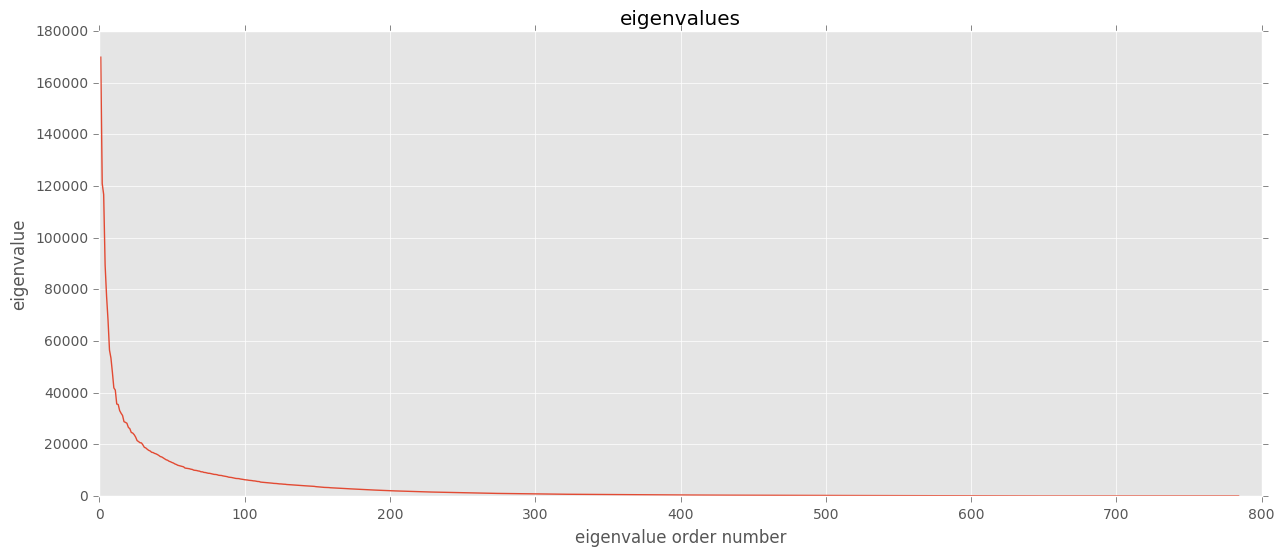

In [8]:
plt.plot(np.arange(1, len(eig_vals) + 1), [eig_pair[0] for eig_pair in eig_pairs])
plt.title('eigenvalues')
plt.xlabel('eigenvalue order number')
plt.ylabel('eigenvalue')
plt.show()

### Plotting explained variance

*Explained variance is equal to $$\frac{\sum\limits_{i=1}^d \lambda_i}{\sum\limits_{i=1}^D \lambda_i},$$ where $D$ is the number of features before the transformation, $d$ - after.*

In [9]:
explained_var = []
for i in range(1, len(eig_vals) + 1):
    explained_var.append(np.sum(eig_vals[:i])/np.sum(eig_vals))

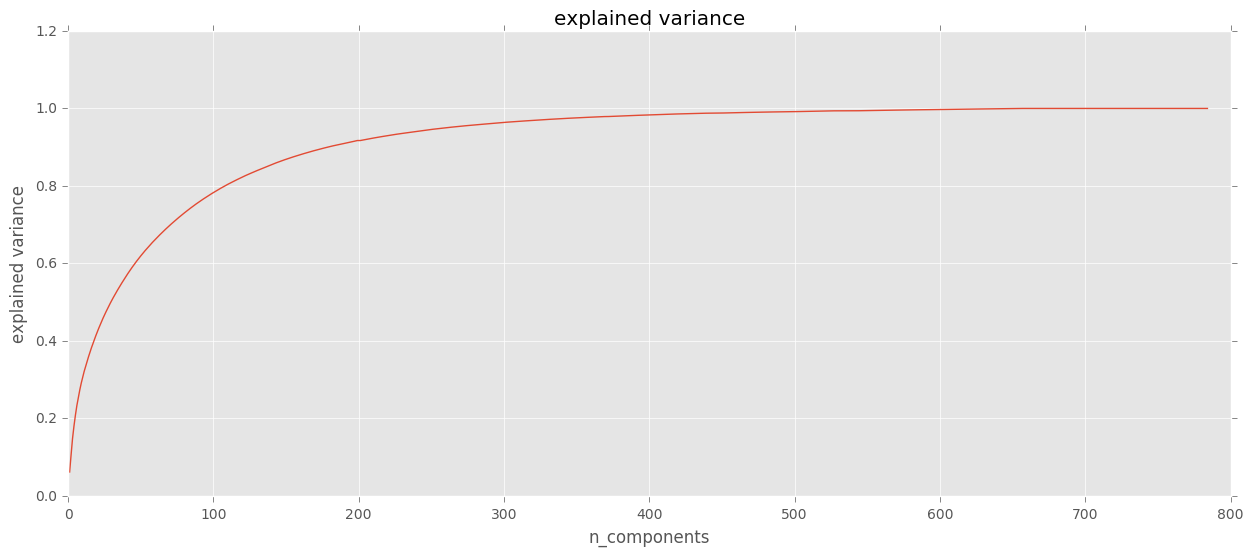

In [10]:
plt.plot(np.arange(1, len(eig_vals) + 1), explained_var)
plt.title('explained variance')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()

*It seems that the best number of components is around 200-300, because from this moment explained variance is increasing very slowly, so it is quite similar to the elbow method.*

# 2 Principal components

*First five digit figures:*

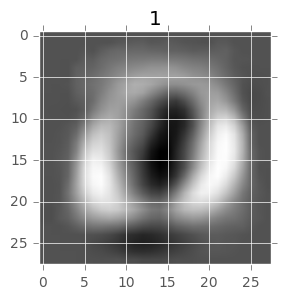

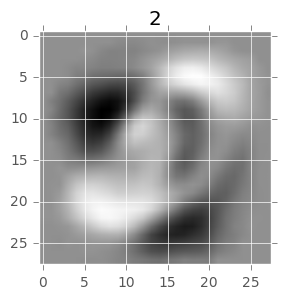

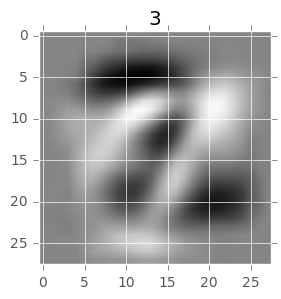

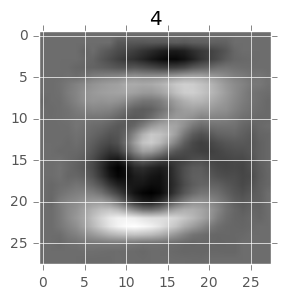

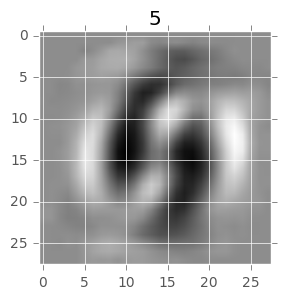

In [11]:
for i in range(5):
    plt.figure(figsize=(3, 3))
    plt.title('{}'.format(i + 1))
    plt.imshow(eig_pairs[i][1].reshape(28, 28), cmap=cm.binary)
    plt.show()